In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np 
import statistics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [3]:
#Importing iris dataset 
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

In [4]:
#Dividing set into train set and test set in ralation 80/20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
#Vector with number of checked classificators 
M = [1,2,5,10,20,50]

#Vectors for false classifications 
tree_false = []
lda_false = []

#Vectors of accuracies 
tree_accouracy = []
lda_accouracy = []

for m in M:
    #Bagging for decision trees
    #Parameter BaggingClassifier() - base_estimator implicity is a decision tree
    bagg_tree = BaggingClassifier(n_estimators = m)
    bagg_tree.fit(X_train,y_train) 
    bagg_tree_predictions = bagg_tree.predict(X_test)
    tree_accouracy.append(bagg_tree.score(X_test,y_test))
    
    #Bagging based on LDA classificator 
    bagg_lda = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),n_estimators=m)
    bagg_lda.fit(X_train, y_train)
    bagg_lda_predictions = bagg_lda.predict(X_test)
    lda_accouracy.append(bagg_lda.score(X_test,y_test))
    
    #False classifications are sum of all cells of confusion matrices, that are not on diagonal 
    tree_false.append(confusion_matrix(y_test, bagg_tree_predictions).sum() - confusion_matrix(y_test, bagg_tree_predictions).diagonal().sum())
    lda_false.append(confusion_matrix(y_test, bagg_lda_predictions).sum() - confusion_matrix(y_test, bagg_lda_predictions).diagonal().sum())

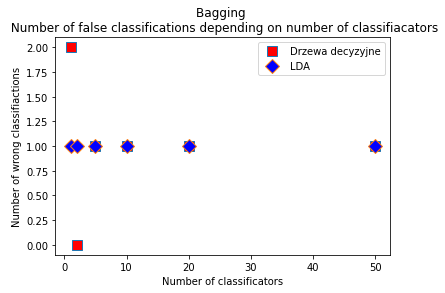

In [6]:
fig, ax = plt.subplots()
ax.plot(M,tree_false, marker='s',linestyle='None',markerfacecolor='red', markersize=10, label="Drzewa decyzyjne")
ax.plot(M,lda_false, marker='D',linestyle='None',markerfacecolor='blue', markersize=10, label="LDA")
ax.set_title('Bagging \n Number of false classifications depending on number of classifiacators')
ax.set_xlabel('Number of classificators')
ax.set_ylabel('Number of wrong classifiactions')
ax.legend()
plt.show()

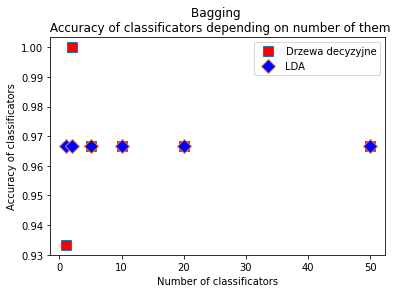

In [10]:
fig, ax = plt.subplots()
ax.plot(M,tree_accouracy, marker='s',linestyle='None',markerfacecolor='red', markersize=10, label="Drzewa decyzyjne")
ax.plot(M,lda_accouracy, marker='D',linestyle='None',markerfacecolor='blue', markersize=10, label="LDA")
ax.set_title('Bagging \n Accuracy of classificators depending on number of them')
ax.set_xlabel('Number of classificators')
ax.set_ylabel('Accuracy of classificators')
ax.legend()
plt.show()

When we use bagging based on decision trees or LDA method there is no major diffrence between accuracies of them.